Using cpu device


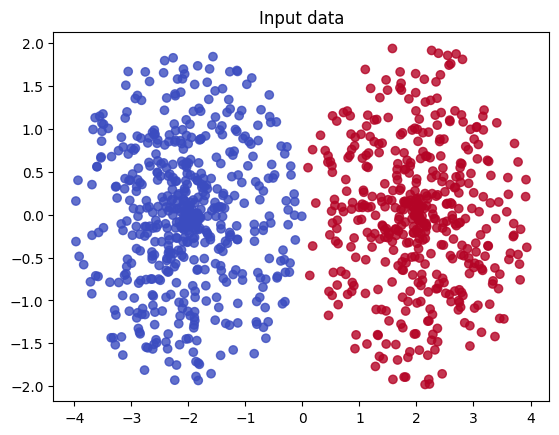

Epoch 0, Loss: 0.8259
Epoch 10, Loss: 0.7111
Epoch 20, Loss: 0.6116
Epoch 30, Loss: 0.5283
Epoch 40, Loss: 0.4603
Epoch 50, Loss: 0.4051
Epoch 60, Loss: 0.3605
Epoch 70, Loss: 0.3241
Epoch 80, Loss: 0.2940
Epoch 90, Loss: 0.2689
Test Accuracy: 0.9980


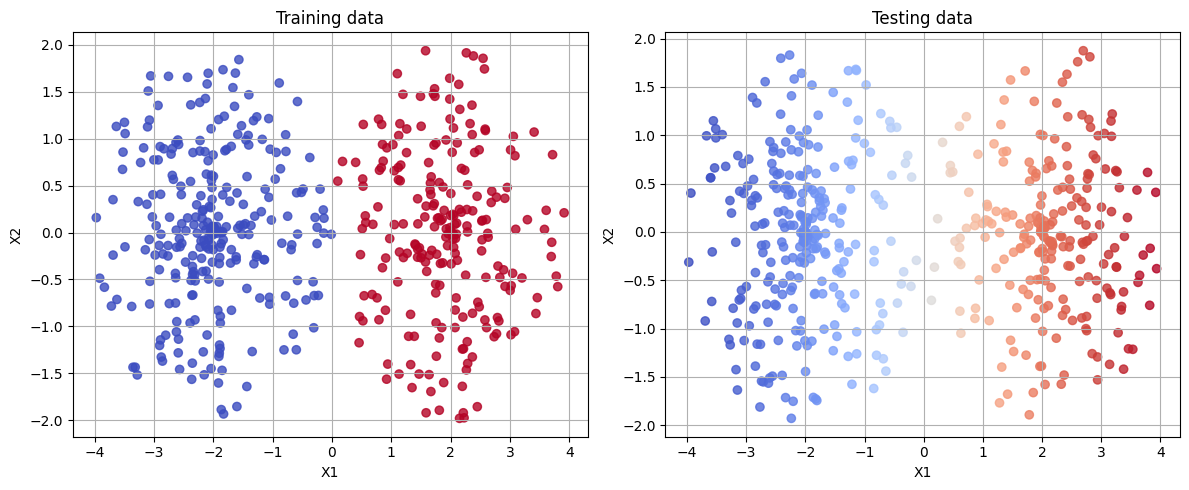

In [23]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# Use GPU if available
dtype = torch.float
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device)

#------------------------------------------------------------------
# Generate sample data
# (see also make_blobs in scikit-learn)
#------------------------------------------------------------------
N=1000

# Random class between 0 and 1
y = torch.rand(N).round()

# Radius according to class
class_offset = 2.0
thetas = 2.0 * torch.pi * torch.rand(N)
radius = torch.rand(N) * 2.0
X = torch.column_stack([
    radius * torch.cos(thetas) + class_offset * ( y * 2 - 1 ),
    radius * torch.sin(thetas)
])

# Plot input
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.8)
plt.title("Input data")
plt.show()

#------------------------------------------------------------------
# Split training and test data
#------------------------------------------------------------------
X_train, X_test = torch.tensor_split(X,2)
y_train, y_test = torch.tensor_split(y.unsqueeze(1),2)

#------------------------------------------------------------------
# define model
#------------------------------------------------------------------
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

# define params
learning_rate=0.01
num_epoch=100

# loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# train neural network
for epoch in range(num_epoch):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # show progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# stop training
model.eval()

with torch.no_grad():
    y_pred_test = model(X_test)
    predicted_classes = (y_pred_test > 0.5).float()
    accuracy = (predicted_classes == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training data (results)
    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", alpha=0.8)
    axes[0].set_title("Training data")
    axes[0].set_xlabel("X1")
    axes[0].set_ylabel("X2")
    axes[0].grid(True)
    
    # Plot testing data (results)
    axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap="coolwarm", alpha=0.8)
    axes[1].set_title("Testing data")
    axes[1].set_xlabel("X1")
    axes[1].set_ylabel("X2")
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    